<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/PyNEC_Install_and_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python でNEC2
PyNEC project Homepage
* https://pypi.org/project/PyNEC/
* https://github.com/tmolteno/python-necpp
* PyNEC のDocument:　
* NEC++ 関数の　Document: http://tmolteno.github.io/necpp/libnecpp_8h.html
* NEC++ のマニュアル : https://github.com/tmolteno/necpp/blob/master/docs/necpp_guide.pdf

Github (NEC++と一緒に使う）
https://github.com/tmolteno/python-necpp
https://github.com/tmolteno/necpp

簡単な使い方
http://astroelec.blogspot.com/2015/05/modeling-antennas-in-python-with-nec2.html

Go Rapperのマニュアル
https://godoc.org/github.com/ctdk/go-libnecpp

NEC2のユーザーズマニュアル
https://www.nec2.org/part_3/toc.html

NEC2 は　モーメント法でのアンテナの計算ができる　線状アンテナが得意　


In [0]:
 #ファイル類をコピーする
 !git clone --recursive https://github.com/tmolteno/python-necpp.git

Cloning into 'python-necpp'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 513 (delta 31), reused 47 (delta 21), pack-reused 443
Receiving objects: 100% (513/513), 129.39 KiB | 2.75 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Submodule 'necpp_src' (https://github.com/tmolteno/necpp.git) registered for path 'necpp_src'
Cloning into '/content/python-necpp/necpp_src'...
remote: Enumerating objects: 6, done.        
remote: Counting objects: 100% (6/6), done.        
remote: Compressing objects: 100% (6/6), done.        
remote: Total 3016 (delta 0), reused 1 (delta 0), pack-reused 3010        
Receiving objects: 100% (3016/3016), 2.71 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (2251/2251), done.
Submodule path 'necpp_src': checked out '0af22b10d5b8e96da412009ef1178f1b4131cbb8'


In [0]:
# pip で　pynecをインストール
!pip install pynec

     |████████████████████████████████| 225kB 3.5MB/s 
  Created wheel for pynec: filename=PyNEC-1.7.3.4-cp36-cp36m-linux_x86_64.whl size=1489236 sha256=8bf14829cc371740735a2dbea3ff747572bae716851c0e70b1f4c3ae3f653716
  Stored in directory: /root/.cache/pip/wheels/df/64/17/0e11fec68fc61babe8fb5de5316e0c911e4f41ec694f4c0bcc
Successfully built pynec


In [0]:
!ls

python-necpp  sample_data


#Example のファイルを見る


In [0]:
%cd /content/python-necpp/PyNEC/example
!ls

/content/python-necpp/PyNEC/example
antenna_util.py			    README.md
context_clean.py		    test_ai.py
dipole.py			    test_charge_densities.py
impedance_plot.py		    test_ne_nh.py
logperiodic_opt.py		    test_nrp.py
monopole.py			    test_rp2.py
monopole_realistic_ground_plane.py  test_rp.py
optimized.py			    test_se.py
__pycache__			    test_structure_currents.py
radiation_pattern.py		    test_surface_patch_currents.py


#テスト類　の　実行　１
ソース・ファイルで実行
　Test_rp.py

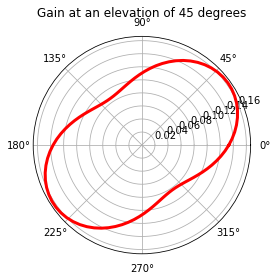

In [0]:
from PyNEC import *
import numpy as np

#creation of a nec context
context=nec_context()

#get the associated geometry
geo = context.get_geometry()

#add wires to the geometry
geo.wire(0, 36, 0, 0, 0, -0.042, 0.008, 0.017, 0.001, 1.0, 1.0)
context.geometry_complete(0)

context.gn_card(-1, 0, 0, 0, 0, 0, 0, 0)

#add a "ex" card to specify an excitation
context.ex_card(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)

#add a "fr" card to specify the frequency 
context.fr_card(0, 2, 2400, 100.0e6)

#add a "rp" card to specify radiation pattern sampling parameters and to cause program execution
context.rp_card(0, 91, 1, 0, 5, 0, 0, 0.0, 45.0, 4.0, 2.0, 1.0, 0.0)

#get the radiation_pattern
rp = context.get_radiation_pattern(0)

# Gains are in decibels
gains_db = rp.get_gain()
gains = 10.0**(gains_db / 10.0)
thetas = rp.get_theta_angles() * 3.1415 / 180.0
phis = rp.get_phi_angles() * 3.1415 / 180.0


# Plot stuff
import matplotlib.pyplot as plt

ax = plt.subplot(111, polar=True)
ax.plot(thetas, gains[:,0], color='r', linewidth=3)
ax.grid(True)

ax.set_title("Gain at an elevation of 45 degrees", va='bottom')
plt.savefig('RadiationPattern.png')
plt.show()

#python 実行してみる

In [0]:
!python monopole.py

Impedance at base=0.50, length=4.00 : ( 142.2,-422.5I) Ohms


In [0]:
!python impedance_plot.py

<Figure size 640x480 with 1 Axes>


上の例では、Figureが出てきたと出ているので、コードを貼って動かす。

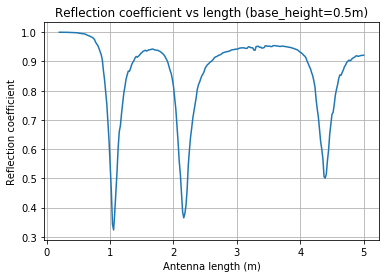

<Figure size 432x288 with 0 Axes>

In [0]:
#
#  Plot of reflection coefficient vs antenna length for a fixed base height.
#
import monopole
import numpy as np
import pylab as plt
from antenna_util import reflection_coefficient

lengths = np.linspace(0.2, 5.0, 270)
reflections = []
z0 = 50

for l in lengths:
  freq = 134.5
  z = monopole.impedance(freq, base=0.5, length=l)
  reflections.append(reflection_coefficient(z, z0))
 
plt.plot(lengths, reflections)
plt.xlabel("Antenna length (m)")
plt.ylabel("Reflection coefficient")
plt.title("Reflection coefficient vs length (base_height=0.5m)")
plt.grid(True)
plt.show()
plt.savefig("reflection_coefficient.png")

In [0]:
!python radiation_pattern.py

Impedance is [468.7135021-863.52284873j]
900
0j
(-0.006682579974339484+0.002565745412095065j)
(-0.0034015856608963996-0.001669279408287194j)
(-0.0005519538959831143-0.01666974425273082j)
(-0.03228732735828246-0.02808750058165444j)
(-0.08736611824557376+0.005123478915604075j)
(-0.0561864614362478+0.09247690692420024j)
(0.05944692055453548+0.14318901270268566j)
(0.07300556909641207+0.08977432235638753j)
(-2.783271475233975e-12-3.249603296429194e-12j)
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
(-0.006682579974339484+0.002565745412095065j)
(-0.0034015856608963996-0.001669279408287194j)
(-0.0005519538959831143-0.01666974425273082j)
(-0.03228732735828246-0.02808750058165444j)
(-0.08736611824557376+0.005123478915604075j)
(-0.0561864614362478+0.09247690692420024j)
(0.05944692055453548+0.14318901270268566j)
(0.07300556909641207+0.08977432235638753j)
(-2.783271475233975e-12-3.249603296429194e-12j)
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
(-0.006682579974

In [0]:
!python monopole_realistic_ground_plane.py

Wavelength is 0.1155m, initial length is 0.0289m
Traceback (most recent call last):
  File "monopole_realistic_ground_plane.py", line 142, in <module>
    z = simulate_and_get_impedance(geometry_monopole_ground(design_freq_mhz, initial_length, ground_wire_length, nr_segments))
  File "monopole_realistic_ground_plane.py", line 37, in geometry_monopole_ground
    nec.set_extended_thin_wire_kernel(True)
  File "/content/python-necpp/PyNEC/example/context_clean.py", line 104, in set_extended_thin_wire_kernel
    self.context.set_extended_thin_wire_kernel(1)
  File "/usr/local/lib/python3.6/dist-packages/PyNEC.py", line 181, in set_extended_thin_wire_kernel
    return _PyNEC.nec_context_set_extended_thin_wire_kernel(self, ekflag)
TypeError: in method 'nec_context_set_extended_thin_wire_kernel', argument 2 of type 'bool'


In [0]:
#
#  Automatically tune antenna
#
import monopole
import scipy.optimize
import numpy as np
from antenna_util import reflection_coefficient

# A function that will be minimized when the impedance is 50 Ohms
# We convert the height and antenna length to positive
# numbers using exp. because otherwise the antenna will lie
# below ground and cause an error in simulation.
def target(x):
  global freq
  base_height = np.exp(x[0]) # Make it positive
  length = np.exp(x[1])  # Make it positive
  z = monopole.impedance(freq, base_height, length)
  return reflection_coefficient(z, z0=50.0)
  

# Starting value 
freq = 134.5
x0 = [-2.0, 0.0]
# Carry out the minimization
log_base, log_length = scipy.optimize.fmin(target, x0)

base_height = np.exp(log_base)
length = np.exp(log_length)

print("Optimium base_height={}m, h={}m, impedance={} Ohms".format(base_height, length, monopole.impedance(freq, base_height, length)))

Optimization terminated successfully.
         Current function value: 0.389954
         Iterations: 75
         Function evaluations: 142
Optimium base_height=4.278159526454139e-05m, h=1.0267442174356574m, impedance=[110.96062495-16.23646694j] Ohms
